# Welcome to Aragog - Scraper for academics

<i>If you wish to cite this scraper or modify it, please cite as follows: van Arenthals, W. M. (2020, June 1). Aragog - Webscraper for academics [Software]. Retrieved from https://www.eagl.nl</i>

## Step 0: Importing packages and setting base variables

In [127]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sb
%matplotlib inline

Dictionary with each tech subcategory and the according category ID

In [46]:
categories = {
    "3D printing" : 331,
    "Apps" : 332,
    "Camera equipment" : 333,
    "DIY electronics" : 334,
    "Fabrication Tools" : 335,
    "Flight" : 336,
    "Gadgets" : 337,
    "Hardware" : 52,
    "Makerspaces" : 362,
    "Robots" : 338,
    "Software" : 54,
    "Sound" : 339,
    "Space exploration" : 340,
    "Wearables" : 341,
    "Web" : 342
}

In [47]:
cat_id = 16 # --> 16 is tech category
page_num = 1
_base_url = f"https://www.kickstarter.com/discover/advanced?category_id={cat_id}&sort=newest&seed=2636583&page={page_num}"

Let them know it's me, Merijn

In [48]:
headers = {
    'User-Agent': 'MerijnvA, Eagl.nl',
    'From': 'merijn@eagl.nl'
}

## Step 1: Defining important variables and first overview
This section is all about setting things up. We want to make sure that the scraper will scrape the right things with the right base url etc.

When all is set up correctly, the code below should run a '200' status and return the number of potential projects that you should be able to index

In [168]:
cat_id = 16 # --> 16 is tech category
page_num = 1
_base_url = f"https://www.kickstarter.com/discover/advanced?category_id={cat_id}&sort=newest&seed=2636583&page={page_num}"
response = requests.get(_base_url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

status_code = response.status_code
number_projects = soup.find(class_="count ksr-green-500").get_text(strip=True)

print(f"Request returned the following code:{status_code} \nAragog will be able to scrape {number_projects}")

Request returned the following code:200 
Aragog will be able to scrape 41,071 projects


This should not yet be that big of a problem. Let's continue our journey and explore how many data points we will be able to find in each category on its own. <i>Please note that on kickstarter, one project can be added to multiple categories!</i>

In [169]:
data = []
for name, ks_id in categories.items():
    #First set the right category
    cat_id = ks_id
    page_num = 1
    _base_url = f"https://www.kickstarter.com/discover/advanced?category_id={cat_id}&sort=newest&seed=2636583&page={page_num}"
    cat_id = ks_id
    
    #Build the link and parse the site
    response = requests.get(_base_url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    number_projects = soup.find(class_="count ksr-green-500").get_text(strip=True)
    number_projects = ','.join(number_projects.split())[:-9].replace(',', '')
    number_projects = int(number_projects)
    
    #Save the data to the list
    data.append([name, ks_id, _base_url, number_projects])
    print(f"Succesfully scraped {name}!")
print("Scraping done!")

Succesfully scraped 3D printing!
Succesfully scraped Apps!
Succesfully scraped Camera equipment!
Succesfully scraped DIY electronics!
Succesfully scraped Fabrication Tools!
Succesfully scraped Flight!
Succesfully scraped Gadgets!
Succesfully scraped Hardware!
Succesfully scraped Makerspaces!
Succesfully scraped Robots!
Succesfully scraped Software!
Succesfully scraped Sound!
Succesfully scraped Space exploration!
Succesfully scraped Wearables!
Succesfully scraped Web!
Scraping done!


Now that all the data has been collected for the first run, we need to transform this to a dataframe

In [170]:
#List -> Array -> Dataframe
np.array(data)
df = pd.DataFrame(data=data, columns=["Title", "ID", "URL", "N"])
df.describe()
df

,Title,ID,URL,N
0,3D printing,331,https://www.kickstarter.com/discover/advanced?...,864
1,Apps,332,https://www.kickstarter.com/discover/advanced?...,8377
2,Camera equipment,333,https://www.kickstarter.com/discover/advanced?...,578
3,DIY electronics,334,https://www.kickstarter.com/discover/advanced?...,1210
4,Fabrication Tools,335,https://www.kickstarter.com/discover/advanced?...,324
5,Flight,336,https://www.kickstarter.com/discover/advanced?...,465
6,Gadgets,337,https://www.kickstarter.com/discover/advanced?...,4373
7,Hardware,52,https://www.kickstarter.com/discover/advanced?...,4353
8,Makerspaces,362,https://www.kickstarter.com/discover/advanced?...,299
9,Robots,338,https://www.kickstarter.com/discover/advanced?...,736


## Step 2: Visualizing data

([<matplotlib.patches.Wedge at 0x1785b765448>,
 [Text(-0.27539911400457023, 3.288488304374139, '3D printing'),
  Text(-2.7354551731727503, 1.845883256211627, 'Apps'),
  Text(-3.1783540408596527, -0.8877305846658203, 'Camera equipment'),
  Text(-2.9782325104231306, -1.4213131653012787, 'DIY electronics'),
  Text(-2.7354550705584595, -1.8458834082780027, 'Fabrication Tools'),
  Text(-2.5867947799844107, -2.0490223928120956, 'Flight'),
  Text(-1.3847750011771367, -2.995396166805797, 'Gadgets'),
  Text(1.3178154530603274, -3.0254524342113536, 'Hardware'),
  Text(2.5022952624468426, -2.1513991771719376, 'Makerspaces'),
  Text(2.704741510554709, -1.8906013226172864, 'Robots'),
  Text(3.22359948246598, -0.7059790199751463, 'Software'),
  Text(3.2338188047235903, 0.6575834078016964, 'Sound'),
  Text(3.1193461691237854, 1.076884152159723, 'Space exploration'),
  Text(2.8481009141925133, 1.6668296801340472, 'Wearables'),
  Text(1.4102149163319342, 2.983503626569761, 'Web')])

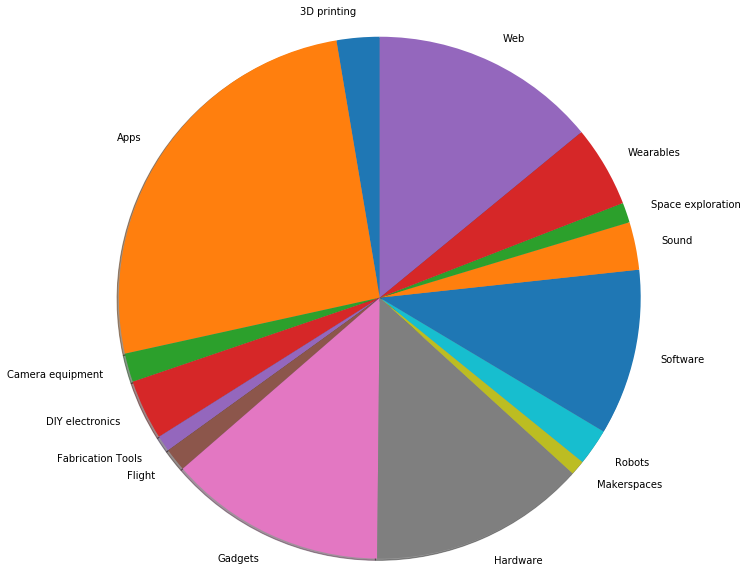

In [171]:
plt.pie(df["N"],
        labels=df["Title"],
        startangle=90,
        shadow=True,
        radius=3)

In [151]:
df.to_excel("output.xlsx")

In [181]:
# Code works when it stops after page=25

page_num = 23 #Make sure that the page-number is back to zero
data = []
for name, ks_id in categories.items():
    cat_id = 362
    
    while soup.findAll(text="Looks like we couldn’t find any results") != True :
        _base_url = f"https://www.kickstarter.com/discover/advanced?category_id={cat_id}&sort=newest&seed=2636583&page={page_num}"
        response = requests.get(_base_url, headers=headers)
        print(f"indexed page: {_base_url}")
        #Increase the page number to continue the loop
        page_num = page_num + 1
    
print("Scraping is done!")

indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=23
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=24
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=25
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=26
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=27
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=28
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=29
indexed page: https://www.kickstarter.com/discover/advanced?category_id=362&sort=newest&seed=2636583&page=30


KeyboardInterrupt: 